# Project 2

Griffith Stites and Becca Suchower

# Question
## How does the amount of sleep in a population affect the spread of illness throughout that population?

Several studies have linked immune system activity to amount of sleep.  An inappropriate amount of sleep - either too little or too much - can weaken the immune system. This can make it easier for individuals to become infected by a sickness. This model aims to determine how having different percentages of the population with different amounts of sleep affects the spread of a sickness accross that population.

### To Do
* Fix slope function
* Survey with Olin students, how much sleep do they get?
* Implement number of Olin students into total enrollment (335). Make sure to prevent fractional students!

We based our assumptions on a study from 2012, titled "A Prospective Study of Sleep Duration and Pneumonia Risk in Women" (https://academic.oup.com/sleep/article/35/1/97/2453920).

This study recorded the average nightly hours of sleep from ≤ 5, 6, 7, 8, and ≥ 9 hours.  The number of participants for each sleep category was recorded, along with the number of pneumonia cases for each group.

Using this data, we assumed that immune system function and sleep duration were linked.

Table 1: https://academic.oup.com/view-large/77947225

Table 2: https://academic.oup.com/view-large/77947227

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

# import matlab like plotting functions
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure

# Model

This model relies on a lot of stocks (11 to be specific). There are susceptible and infected stocks for all sleep values, because the contact rate is different for each. There is one recovered stock for all recovered individuals.

In [2]:
def make_system(sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, infectedInitial, beta5, beta6, beta7, beta8, beta9, beta, gamma):
    """Make a system object for the SIR model.
    
    sleepFive: Percentage of the population with five or less hours of sleep
    sleepSix: Percentage of the population with six hours of sleep
    sleepSeven: Percentage of the population with seven hours of sleep
    sleepEight: Percentage of the population with eight hours of sleep
    sleepNine: Percentage of the population with nine or more hours of sleep
    infectedInitial: Percentage of the population that starts out infected
    
    beta5: contact rate multiplier in for five hours of sleep
    beta6: contact rate multiplier for six hours of sleep
    beta7: contact rate multiplier for seven hours of sleep
    beta8: contact rate multiplier for eight hours of sleep
    beta9: contact rate multiplier for nine hours of sleep
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    TotalPopulation = 1000
    SusceptiblePopulation = 1000 - (initialInfected * TotalPopulation)
    
    S5 = sleepFive * SusceptiblePopulation
    S6 = sleepSix * SusceptiblePopulation
    S7 = sleepSeven * SusceptiblePopulation
    S8 = sleepEight * SusceptiblePopulation
    S9 = sleepNine *  SusceptiblePopulation 
    
    I5 = sleepFive * TotalPopulation * infectedInitial
    I6 = sleepSix * TotalPopulation * infectedInitial
    I7 = sleepSeven * TotalPopulation * infectedInitial
    I8 = sleepEight * TotalPopulation * infectedInitial
    I9 = sleepNine * TotalPopulation * infectedInitial
    
    init = State(S5=S5, S6=S6, S7=S7, S8=S8, S9=S9, 
                 I5=I5, I6=I6, I7=I7, I8=I8, I9=I9, 
                 R=0)
    init /= np.sum(init)
    
    #Time in days
    t0 = 0
    t_end = 100
    

    return System(init=init, t0=t0, t_end=t_end,
                  beta5=beta5, beta6=beta6, beta7=beta7, beta8=beta8, beta9=beta9,
                  beta=beta, gamma=gamma)

The plot_results_all function plots the results of the model. 

In [24]:
def plot_results(results, sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine):
    """Plot the results of a SIR model and a pie chart of the population breakdown.
    
    results: Dataframe with the results of the model
    sleepFive: Fraction of population with five hours of sleep
    sleepSix: Fraction of population with six hours of sleep
    sleepSeven: Fraction of population with seven hours of sleep
    sleepEight: Fraction of popultaion with eight hours of sleep
    sleepNine: Fraction of population with nine hours of sleep"""
    TotalSusceptible = results.S5 + results.S6 + results.S7 + results.S8 + results.S9
    TotalInfected = results.I5 + results.I6 + results.I7 + results.I8 + results.I9

    figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
    font = {'family' : 'DejaVu Sans',
            'weight' : 'normal',
            'size'   : 30}

    matplotlib.rc('font', **font)

    plt.figure(1)
    plt.subplot(1, 2, 1)
    plt.plot(results.index, results.R)
    plt.plot(results.index, TotalSusceptible)
    plt.plot(results.index, TotalInfected)
    plt.title('SIR Plot', fontsize = 40)
    plt.xlabel('Time (Days)', fontsize = 20)
    plt.ylabel('Population (Fraction of Population)', fontsize = 20)
           
    plt.subplot(1, 2, 2)
    labels = '5 Hours', '6 Hours', '7 Hours', '8 Hours', '9 Hours'
    sizes = [sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine]
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue' , 'yellow']
    explode = (0, 0, 0, 0.1, 0)  # explode fourth slice
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title('Population Sleep Breakdown', fontsize = 40)
    plt.show()

In [3]:
def plot_results_all(results, title):
    """Plot the results of a SIR model.
    
    results: Dataframe with the results of the model
    """
    TotalSusceptible = results.S5 + results.S6 + results.S7 + results.S8 + results.S9
    TotalInfected = results.I5 + results.I6 + results.I7 + results.I8 + results.I9

    plot(TotalSusceptible, '--', label='Total Susceptible')
    plot(TotalInfected, '-', label='Total Infected')
    plot(results.R, ':', label='Total Recovered')
    decorate(title = title,
             xlabel = 'Time (days)',
             ylabel = 'Population')

The plot_population function generates a pie chart of the percentages of the population in each sleep category.  This will be helpful later on when we show different cases.

In [6]:
def plot_populations(sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine):
    """Plot the starting populations for each sleep value.
    
    sleepFive: Fraction of population with five hours of sleep
    sleepSix: Fraction of population with six hours of sleep
    sleepSeven: Fraction of population with seven hours of sleep
    sleepEight: Fraction of popultaion with eight hours of sleep
    sleepNine: Fraction of population with nine hours of sleep
    """
    labels = '5 Hours', '6 Hours', '7 Hours', '8 Hours', '9 Hours'
    sizes = [sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine]
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue' , 'yellow']
    explode = (0, 0, 0, 0.1, 0)  # explode fourth slice
 
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
 
    plt.axis('equal')
    plt.show()

In [7]:
def calc_total_infected(results):
    """Fraction of population infected during the simulation.
    
    results: DataFrame
    
    returns: fraction of population
    """
    TotalSusceptible = results.S5 + results.S6 + results.S7 + results.S8 + results.S9
    return get_first_value(TotalSusceptible) - get_last_value(TotalSusceptible)

In [8]:
"""Uses the make_system function to make a system. Having the make_system function makes 
changing the size of each sleep group and the initialInfected easy."""

sleepFive = 0.052
sleepSix = 0.233
sleepSeven = 0.427
sleepNine = 0.05
sleepEight = 1 - sleepFive - sleepSix - sleepSeven - sleepNine
initialInfected = 1/90

beta5 = 1.7 #contact rate multiplier in for five hours of sleep
beta6 = 1.29 #contact rate multiplier for six hours of sleep
beta7 = 1.15 #contact rate multiplier for seven hours of sleep
beta8 = 1.0 #contact rate multiplier for eight hours of sleep
beta9 = 1.49 #contact rate multiplier for nine hours of sleep
beta = 0.333
gamma = 0.25
system = make_system(sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, initialInfected, beta5, beta6, beta7, beta8, beta9, beta, gamma)

,values
init,S5 0.051422 S6 0.230411 S7 0.422256 S...
t0,0
t_end,100
beta5,1.7
beta6,1.29
beta7,1.15
beta8,1
beta9,1.49
beta,0.333
gamma,0.25


In [9]:
def update_func(state, dt, system):
    """Update the SIR model.
    
    state: State (s5, s6, s7, s8, s9, i5, i6, i7, i8, i9, r)
    dt: Change in the time step
    system: System object
    
    returns: pair of derivatives
    """ 
    s5, s6, s7, s8, s9, i5, i6, i7, i8, i9, r = state
    unpack(system)
    
    s = s5 + s6 + s7 + s8 + s9 # Total susceptible
    i = i5 + i6 + i7 + i8 + i9 # Total infected
    
    
    #VERIFY: Check: total change in infected = -(total change in susceptible) - (total change in recovered)
    s5 += (-(beta*beta5) * i * (s5)) * dt 
    i5 += ((beta*beta5) * i * (s5) - gamma * i5) * dt 
    
    s6 += (-(beta*beta6) * i * (s6)) * dt
    i6 += ((beta*beta6) * i * (s6) - gamma * i6) * dt
    
    s7 += (-(beta*beta7) * i * (s7)) * dt
    i7 += ((beta*beta7) * i * (s7) - gamma * i7) * dt
    
    s8 += (-(beta*beta8) * i * (s8)) * dt
    i8 += ((beta*beta8) * i * (s8) - gamma * i8) * dt
    
    s9 += (-(beta*beta9) * i * (s9)) * dt
    i9 += ((beta*beta9) * i * (s9) - gamma * i9) * dt

    r += (gamma * i) * dt
    
    return State(S5 = s5, I5=i5, S6=s6, I6=i6, S7=s7, I7=i7, S8=s8, I8=i8, S9=s9, I9=i9, R=r)

In [10]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    dt = .1
    
    for t in linrange(t0, t_end, dt):
        frame.row[t+dt] = update_func(frame.row[t], dt, system)
    
    return frame

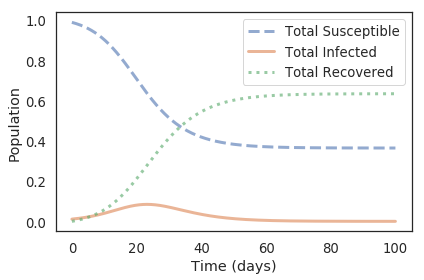

In [11]:
sleepFive = 0.052
sleepSix = 0.233
sleepSeven = 0.427
sleepNine = 0.05
sleepEight = 1 - sleepFive - sleepSix - sleepSeven - sleepNine
system = make_system(sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine, initialInfected, beta5, beta6, beta7, beta8, beta9, beta, gamma)

results = run_simulation(system, update_func)
plot_results_all(results, "")

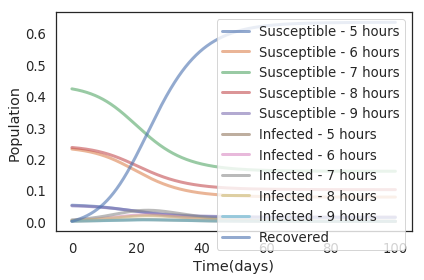

In [12]:
plot_results_seperate(results,"")

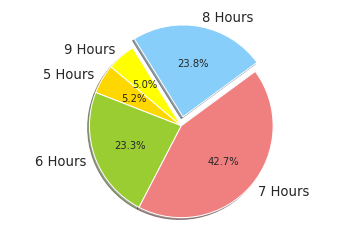

In [13]:
plot_populations(sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine)

In [14]:
calc_total_infected(results)

0.6245261475249883

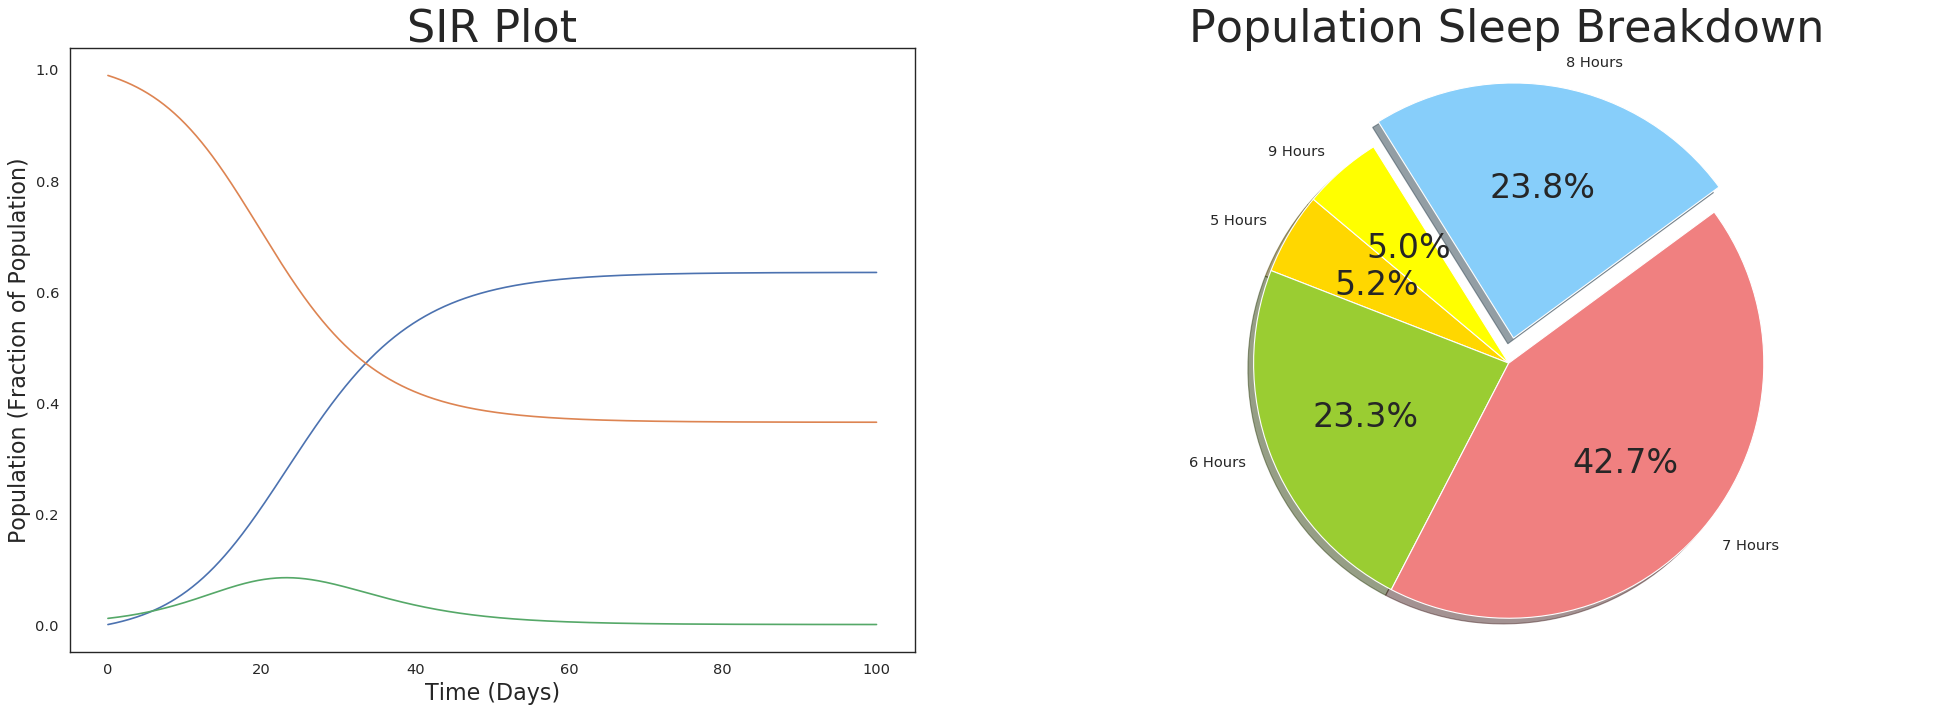

In [20]:
TotalSusceptible = results.S5 + results.S6 + results.S7 + results.S8 + results.S9
TotalInfected = results.I5 + results.I6 + results.I7 + results.I8 + results.I9

figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 30}

matplotlib.rc('font', **font)

plt.figure(1)
plt.subplot(1, 2, 1)
plt.plot(results.index, results.R)
plt.plot(results.index, TotalSusceptible)
plt.plot(results.index, TotalInfected)
plt.title('SIR Plot', fontsize = 40)
plt.xlabel('Time (Days)', fontsize = 20)
plt.ylabel('Population (Fraction of Population)', fontsize = 20)
           
plt.subplot(1, 2, 2)
labels = '5 Hours', '6 Hours', '7 Hours', '8 Hours', '9 Hours'
sizes = [sleepFive, sleepSix, sleepSeven, sleepEight, sleepNine]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue' , 'yellow']
explode = (0, 0, 0, 0.1, 0)  # explode fourth slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Population Sleep Breakdown', fontsize = 40)
plt.show()

# Results

# Interpretation

# Abstract